#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [4]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
pd.set_option('display.max_rows', None)

In [5]:
df_flights = pd.read_csv(r'..\..\2_data\flights_random_sample.csv', sep=',')
df_flights.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2018-01-01,WN,WN,WN,5431,WN,N291WN,5431,12889,LAS,...,986,1.0,0.0,0.0,0.0,18.0,NaN,NaN,NaN,NaN
1,2018-01-01,WN,WN,WN,989,WN,N287WN,989,12889,LAS,...,1099,0.0,0.0,11.0,0.0,35.0,NaN,NaN,NaN,NaN
2,2018-01-01,WN,WN,WN,1664,WN,N751SW,1664,12889,LAS,...,1099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01,WN,WN,WN,1106,WN,N704SW,1106,12889,LAS,...,197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01,WN,WN,WN,1559,WN,N423WN,1559,12889,LAS,...,197,37.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [6]:
df_flights['month'] = pd.DatetimeIndex(df_flights['fl_date']).month
df_flights.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,month
0,2018-01-01,WN,WN,WN,5431,WN,N291WN,5431,12889,LAS,...,1.0,0.0,0.0,0.0,18.0,NaN,NaN,NaN,NaN,1
1,2018-01-01,WN,WN,WN,989,WN,N287WN,989,12889,LAS,...,0.0,0.0,11.0,0.0,35.0,NaN,NaN,NaN,NaN,1
2,2018-01-01,WN,WN,WN,1664,WN,N751SW,1664,12889,LAS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,2018-01-01,WN,WN,WN,1106,WN,N704SW,1106,12889,LAS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,2018-01-01,WN,WN,WN,1559,WN,N423WN,1559,12889,LAS,...,37.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1


In [7]:
df_flights.groupby('month', as_index=False).agg(median_arr_delay = ('arr_delay','median')).sort_values(by='median_arr_delay', ascending=False)

,month,median_arr_delay
4,5,-5.0
5,6,-5.0
6,7,-5.0
7,8,-5.0
11,12,-5.0
1,2,-6.0
3,4,-6.0
10,11,-6.0
2,3,-7.0
9,10,-7.0


In [8]:
df_flights.groupby('month', as_index=False).agg(mean_arr_delay = ('arr_delay','mean')).sort_values(by='mean_arr_delay', ascending=False)

,month,mean_arr_delay
5,6,10.110002
7,8,10.088413
6,7,8.887685
4,5,6.801185
1,2,6.575149
11,12,6.068550
3,4,5.377257
2,3,2.890610
9,10,2.466155
0,1,2.282651


<AxesSubplot: >

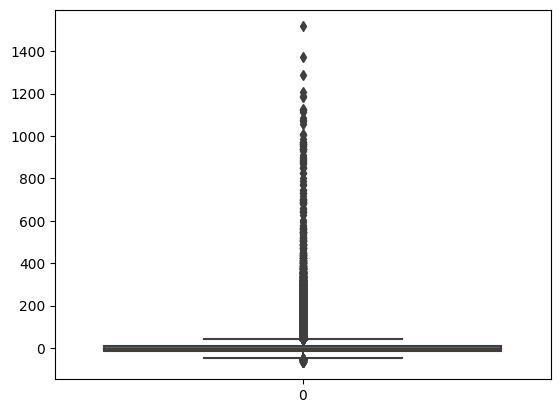

In [9]:
sns.boxplot(data=df_flights['arr_delay'])

<AxesSubplot: xlabel='arr_delay', ylabel='Count'>

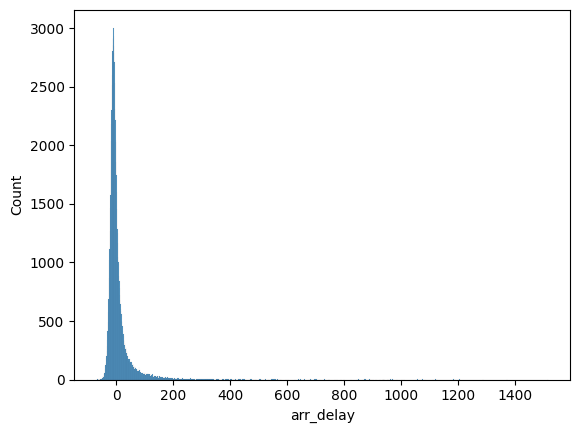

In [10]:
sns.histplot(data=df_flights['arr_delay'])

In [11]:
df_flights['arr_delay'].describe()

count    99110.000000
mean         5.384240
std         48.489584
min        -68.000000
25%        -15.000000
50%         -6.000000
75%          8.000000
max       1516.000000
Name: arr_delay, dtype: float64

In [12]:
df_flights.groupby(['arr_delay','mkt_unique_carrier']).max().sort_values(by='arr_delay', ascending=False).head(20)

,,fl_date,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,...,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,month
arr_delay,mkt_unique_carrier,,,,,,,,,,,,,,,,,,,,,
1516.0,AA,2019-08-07,AA_CODESHARE,AA,3907,MQ,N808AE,3907,11980,GRI,"Grand Island, NE",...,1503.0,0.0,13.0,0.0,0.0,NaN,NaN,NaN,NaN,8
1373.0,AA,2019-10-20,AA,AA,482,AA,N840AW,482,11292,DEN,"Denver, CO",...,769.0,0.0,0.0,0.0,604.0,NaN,NaN,NaN,NaN,10
1288.0,UA,2019-03-11,UA_CODESHARE,UA,4206,EV,N17984,4206,12339,IND,"Indianapolis, IN",...,5.0,0.0,1283.0,0.0,0.0,NaN,NaN,NaN,NaN,3
1205.0,AA,2019-06-18,AA,AA,162,AA,N134AN,162,12173,HNL,"Honolulu, HI",...,0.0,0.0,0.0,1078.0,127.0,NaN,NaN,NaN,NaN,6
1189.0,UA,2018-10-06,UA_CODESHARE,UA,5500,OO,N957SW,5500,14696,SBN,"South Bend, IN",...,1124.0,0.0,34.0,0.0,31.0,NaN,NaN,NaN,NaN,10
1185.0,UA,2019-08-19,UA_CODESHARE,UA,6171,YV,N502MJ,6171,14321,PWM,"Portland, ME",...,0.0,0.0,1185.0,0.0,0.0,NaN,NaN,NaN,NaN,8
1127.0,UA,2019-08-19,UA_CODESHARE,UA,5405,OO,N933EV,5405,11637,FAR,"Fargo, ND",...,1127.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,8
1122.0,DL,2019-07-11,DL_CODESHARE,DL,3285,9E,N834AY,3285,14321,PWM,"Portland, ME",...,112.0,1000.0,10.0,0.0,0.0,1319.0,92.0,92.0,NaN,7
1121.0,NK,2018-05-15,NK,NK,313,NK,N516NK,313,11433,DTW,"Detroit, MI",...,0.0,0.0,1121.0,0.0,0.0,NaN,NaN,NaN,NaN,5


Average / mean monthly flight delay is higher in the summer months in the US - May to August. This may be because people tend to go on vacation more during the summer, especially when children are not in school and families can take trips.

Overall, the distribution of flight delays is highly positively skewed, with some extreme outliers where planes were very delayed.